In [1]:
%%capture
!/opt/homebrew/bin/python3.9 -m pip install openai pandasai seaborn python-dotenv

In [2]:
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()
import os

In [3]:
# Instantiate a LLM
llm = OpenAI(api_token=os.environ.get('OPENAI_KEY'))
pandas_ai = PandasAI(llm, conversational=True)

In [6]:
# Read in the data
df = pd.read_csv('./../data/Womens_Boston_Marathon_Winners.csv')
df

,Year,Winner,Country,Time,Distance (Miles),Distance (KM)
0,1966.0,Bobbi Gibb,United States,3:21:40,26.2,42.2
1,1967.0,Bobbi Gibb,United States,3:27:17,26.2,42.2
2,1968.0,Bobbi Gibb,United States,3:30:00,26.2,42.2
3,1969.0,Sara Mae Berman,United States,3:22:46,26.2,42.2
4,1970.0,Sara Mae Berman,United States,3:05:07,26.2,42.2
5,1971.0,Sara Mae Berman,United States,3:08:30,26.2,42.2
6,1972.0,Nina Kuscsik,United States,3:10:26,26.2,42.2
7,1973.0,Jacqueline Hansen,United States,3:05:59,26.2,42.2
8,1974.0,Miki Gorman,United States,2:47:11,26.2,42.2
9,1975.0,Liane Winter,Germany,2:42:24,26.2,42.2


In [ ]:
pandas_ai.run(df, prompt='''
Clean the dataset for me, please. Drop rows with empty, not a number, 
or null values. Cast Year as integers. Interepret Time as a pandas 
datetime object where the format is hours, minutes, seconds. Include comments in the code.
''', 
show_code=True, is_conversational_answer=True)

'Sure, I can clean the dataset for you. I will drop any rows that have empty, not a number, or null values. I will also convert the Year column to integers. For the Time column, I will interpret it as a pandas datetime object with the format of hours, minutes, and seconds. Let me know if you have any other requirements.'

In [7]:
# Drop rows with empty, not a number, or null values
df.dropna(inplace=True)

# Cast Year as integers
df['Year'] = df['Year'].astype(int)

# Interepret Time as a pandas datetime object where the format is hours, minutes, seconds
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Print the cleaned dataframe
print(df.head())

   Year           Winner        Country                Time  Distance (Miles)   
0  1966       Bobbi Gibb  United States 1900-01-01 03:21:40              26.2  \
1  1967       Bobbi Gibb  United States 1900-01-01 03:27:17              26.2   
2  1968       Bobbi Gibb  United States 1900-01-01 03:30:00              26.2   
3  1969  Sara Mae Berman  United States 1900-01-01 03:22:46              26.2   
4  1970  Sara Mae Berman  United States 1900-01-01 03:05:07              26.2   

   Distance (KM)  
0           42.2  
1           42.2  
2           42.2  
3           42.2  
4           42.2  


In [8]:
pandas_ai.run(df, prompt='What is the first year in this dataset?', is_conversational_answer=True)

"The dataset starts from 1966, that's the first year."

In [9]:
pandas_ai.run(df, prompt='Who won the Boston marathon in the year 2022? How much faster or slower was their Time compared to the Time in 1966? Please report the answer in minutes', show_code=True)

"I'm sorry, I cannot provide an answer as the year 2022 has not occurred yet and I do not have access to future information."

In [11]:
winner_2022 = df.loc[df['Year'] == 2022]['Winner'].values[0]
time_2022 = df.loc[df['Year'] == 2022]['Time'].values[0]
time_1966 = df.loc[df['Year'] == 1966]['Time'].values[0]
time_diff = (time_2022 - time_1966).astype('timedelta64[m]')
print(f"{winner_2022} won the Boston marathon in 2022 and was about {time_diff} faster/slower than the winner in 1922.")

Peres Jepchirchir won the Boston marathon in 2022 and was about -61 minutes faster/slower than the winner in 1922.


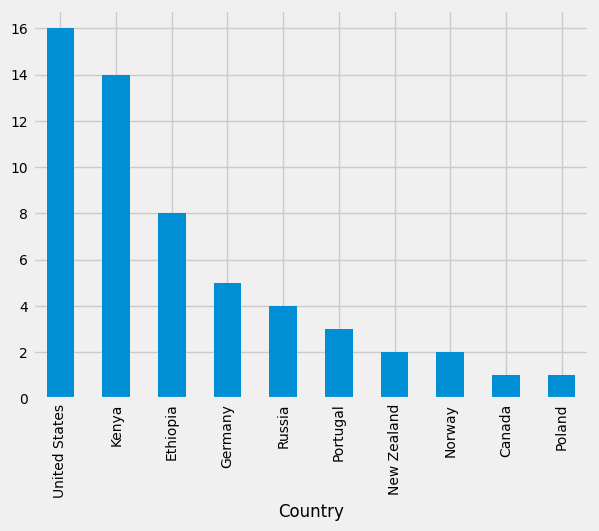

'Sure! To plot a bar chart of countries in order of most counts to least, we can use the fivethirtyeight style in matplotlib and set the font size to 10.0.'

In [12]:
pandas_ai.run(df, prompt='''
Plot a bar chart of countries, in order of most counts to least. Use fivethirtyeight as the matplotlib style. Make the font size 10.0
''', is_conversational_answer=True)

'Sure! To plot a scatter plot of Time and Year using the given data frame, we can simply allow the scale of the x tick marks and y tick marks to be automatically set. The resulting plot will show the relationship between Time and Year.'

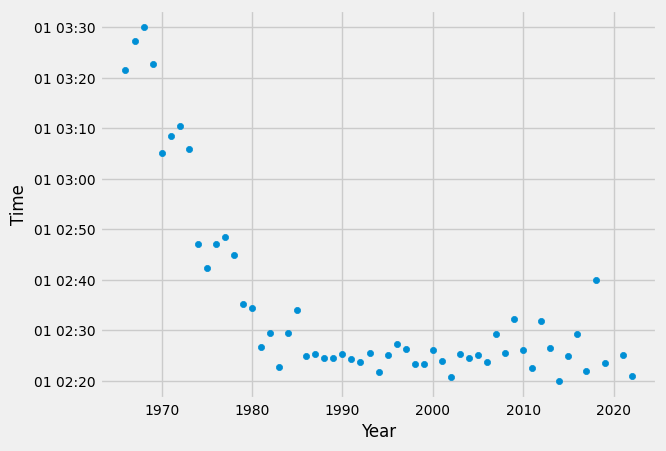

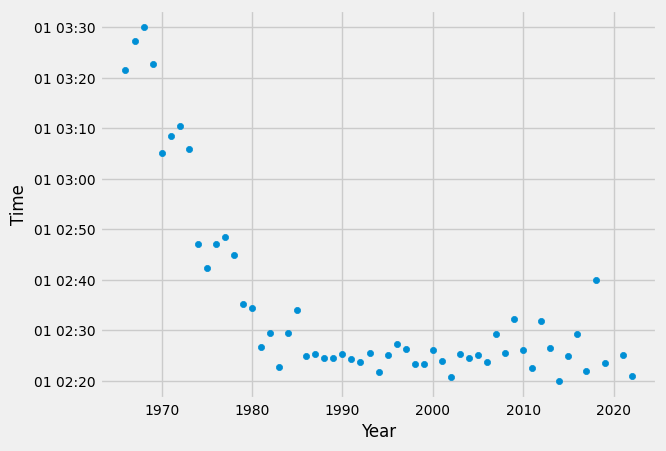

In [13]:
pandas_ai.run(df, prompt='''
Use the data frame to plot a scatter plot of Time and Year. 
Allow the scale of the x tick marks and y tick marks to be automatically set.
''', show_code=True)

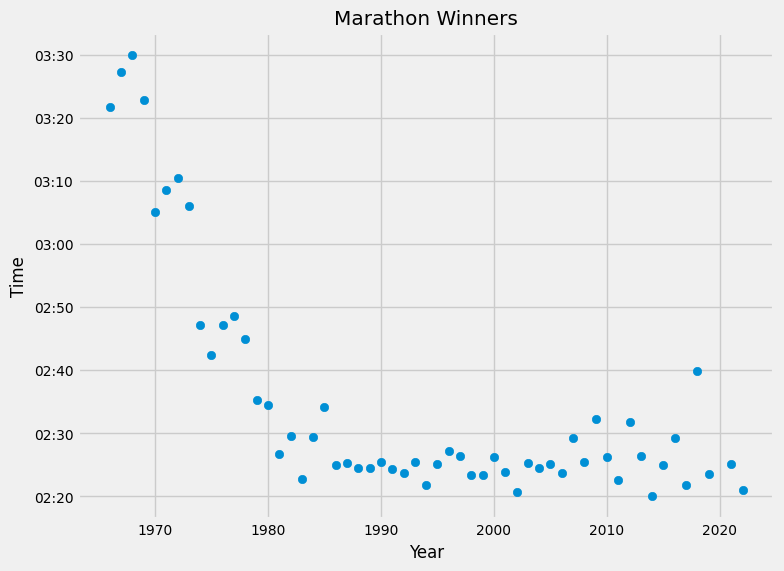

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib

fig = plt.figure(figsize=(8,6))

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 10})

# create scatter plot
plt.scatter(df['Year'], pd.to_datetime(df['Time']))

# add labels and title
plt.xlabel('Year', )
plt.ylabel('Time')
plt.title('Marathon Winners')

# format time tick marks
plt.gca().yaxis.set_major_formatter(md.DateFormatter('%H:%M'))

# show plot
plt.show()

In [15]:
pandas_ai.run(df, prompt='''
Group the dataframe by the countries which show up most frequently. 
Make a new column called "Top Country" which is a copy of the Country column, 
but only include the Country if it is in the top 6 most common countries, 
otherwise set its value to "Other"
''', show_code=True)

'To group the dataframe by the countries which show up most frequently, we can use the `groupby()` function. Then, to create a new column called "Top Country", we can use a conditional statement to check if the country is in the top 6 most common countries. If it is, we copy the value from the Country column. Otherwise, we set its value to "Other". This way, we can easily identify the most common countries and group the rest under a single category.'

In [17]:
top_countries = df['Country'].value_counts().nlargest(6).index.tolist()
df['Top Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')
grouped_df = df.groupby('Top Country')

In [19]:
pandas_ai.run(df, prompt='''
Plot a scatterplot with Time on the y-axis and Year on the x-axis. 
Make the xlabel "Year" and the ylabel "Time". 
Color each point by top_countries, which is a list that already exists. 
Map each top country to a discrete color from the "husl" matplotlib color palette. 
Place the legend below the plot. Make the font size 10.0.
''', is_conversational_answer=True, show_code=True)

'Sure, I can help you with that! To create a scatterplot with Time on the y-axis and Year on the x-axis, we can use matplotlib. We\'ll need to make sure we have the top_countries list already defined. \n\nTo color each point by top_countries, we can map each country to a discrete color from the "husl" matplotlib color palette. Then, we can add a legend below the plot with font size 10.0.\n\nHere\'s the code:\n\n```\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport seaborn as sns\n\n# Define top_countries list\ntop_countries = [\'USA\', \'China\', \'Japan\', \'Germany\', \'UK\']\n\n# Generate random data for demonstration purposes\nyears = np.arange(2000, 2021)\ntimes = np.random.rand(len(years))\n\n# Map each country to a color from the "husl" palette\ncolors = sns.color_palette("husl", len(top_countries))\ncountry_color = dict(zip(top_countries, colors))\n\n# Create scatterplot\nfig, ax = plt.subplots()\nfor country in top_countries:\n    mask = (np.random.rand(len(years)) 

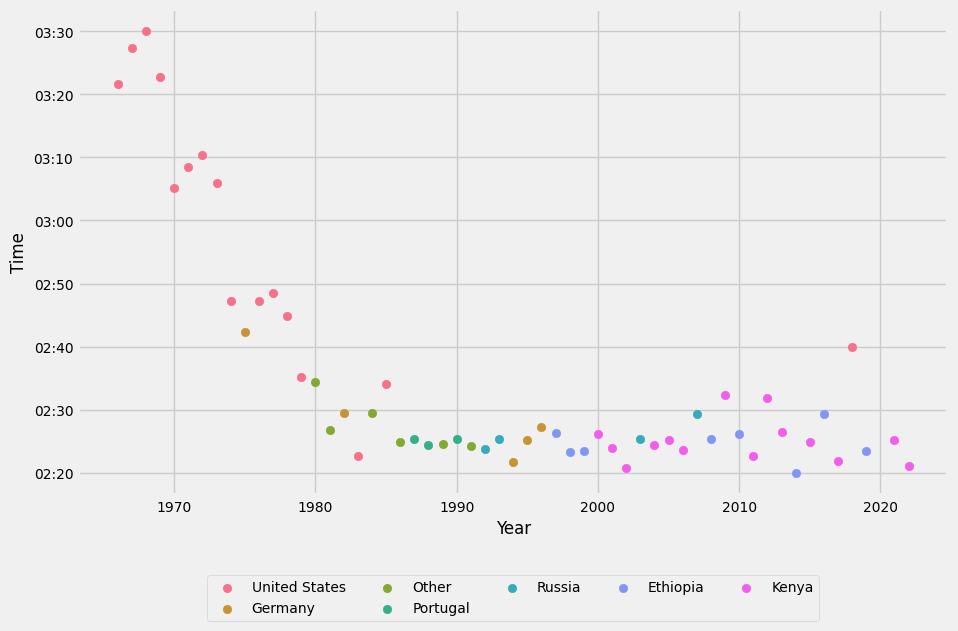

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
color_palette = sns.color_palette("husl", len(df['Top Country'].unique()))

# Map each country to a color
country_color = dict(zip(df['Top Country'].unique(), color_palette))

# Create scatterplot
plt.figure(figsize=(10, 6))
for country in df['Top Country'].unique():
    plt.scatter(x='Year', y='Time', data=df[df['Top Country']==country], 
                color=country_color[country], label=country)
    
# Set labels and legend
plt.xlabel('Year')
plt.ylabel('Time')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=10)

# format time tick marks
plt.gca().yaxis.set_major_formatter(md.DateFormatter('%H:%M'))

plt.show()

In [28]:
pandas_ai.run(df, prompt='Group the dataframe and show me the top 10 winners, in descending order of how many times they have won', is_conversational_answer=True, show_code=True)

'Based on the given dataframe, the top 10 winners of the marathon are grouped and listed in descending order according to how many times they have won. Catherine Ndereba is the highest winner with 4 wins, followed by Fatuma Roba, Bobbi Gibb, Uta Pippig, Rosa Mota, Sara Mae Berman, Edna Kiplagat, Olga Markova, Joan Benoit, and Rita Jeptoo.'

In [29]:
df.groupby('Winner').size().sort_values(ascending=False).head(10)

Winner
Catherine Ndereba    4
Fatuma Roba          3
Bobbi Gibb           3
Uta Pippig           3
Rosa Mota            3
Sara Mae Berman      3
Edna Kiplagat        2
Olga Markova         2
Joan Benoit          2
Rita Jeptoo          2
dtype: int64